In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

raw


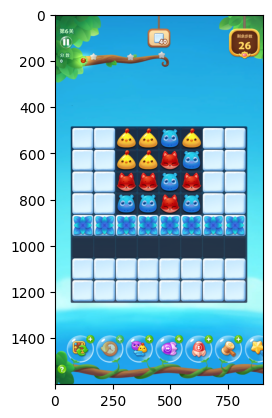

In [13]:
def pImg(name, a):
    print(name)
    plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
    plt.show()


def sImg(arr):
    # 创建一个包含1行3列子图的图形
    fig, axs = plt.subplots(1, len(arr), figsize=(15, 5))

    for idx, (name, a) in enumerate(arr):
        axs[idx].imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
        axs[idx].set_title(name)

    # 调整子图之间的间距
    plt.tight_layout()
    plt.show()


img3 = cv2.imread("files/big-6.png")
pImg('raw', img3)

gray


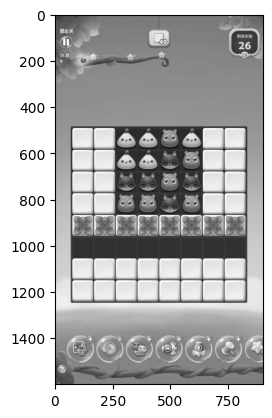

th2


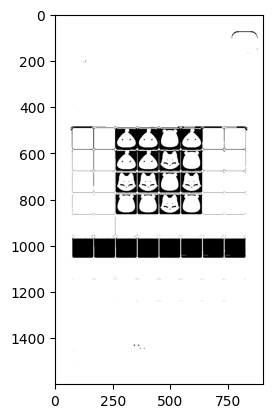

hsv


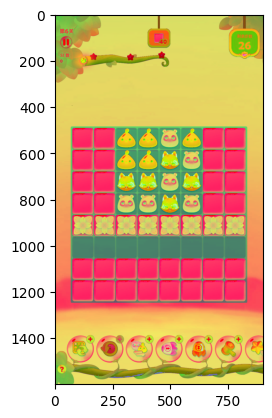

In [14]:
# 将彩色图像转换为灰度图像
imgG = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

pImg("gray", imgG)

# 对灰度图像进行二值化处理
ret, th2 = cv2.threshold(imgG, 0x33, 255, cv2.THRESH_BINARY)
pImg("th2", th2)

hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
pImg("hsv", hsv)

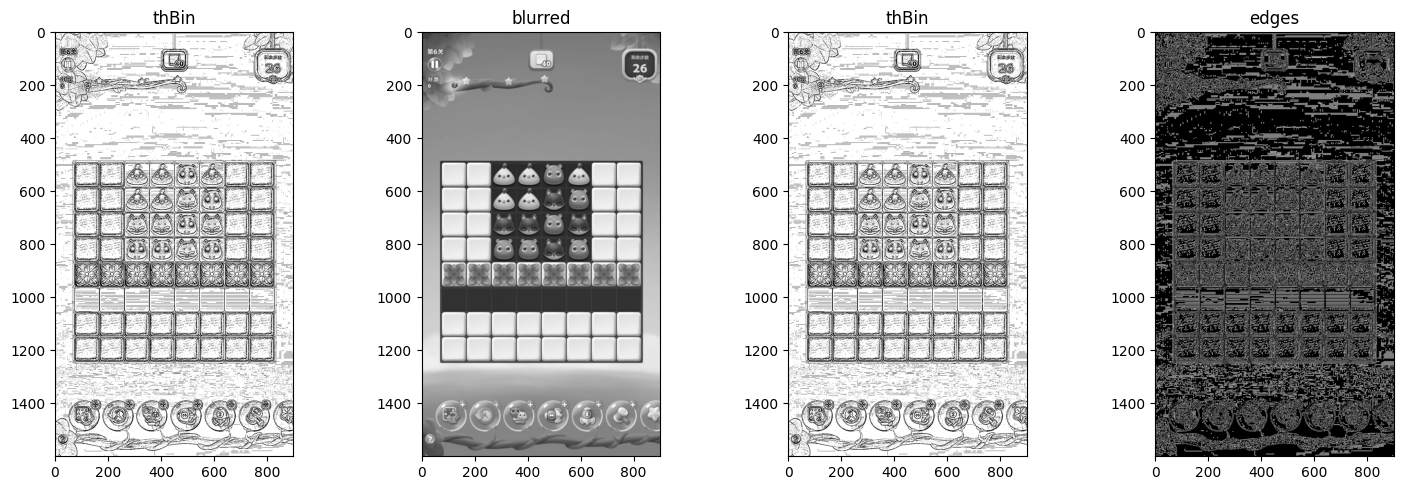

In [15]:
# 提取颜色
# maskL = np.array([100, 50, 20])
# maskR = np.array([140, 255, 100])
# imgMask = cv2.inRange(hsv, lowerb=maskL, upperb=maskR)
# cv2.imshow("imgMask", imgMask)

# 中值滤波
# mediu = cv2.medianBlur(hsv, 3)
# cv2.imshow("mediu", mediu)

# 可以理解为把图片变成只有黑白两种颜色，这样更方便处理，再说咱们处理表格也不需要颜色
thBin = cv2.adaptiveThreshold(imgG, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

blurred = cv2.GaussianBlur(imgG, (3, 3), 0)

# 取反
thBin = cv2.bitwise_not(thBin)

edges = cv2.Canny(thBin, 50, 150)
sImg([
    ["thBin", thBin],
    ["blurred", blurred],
    ["thBin", thBin],
    ["edges", edges],
])

blocks


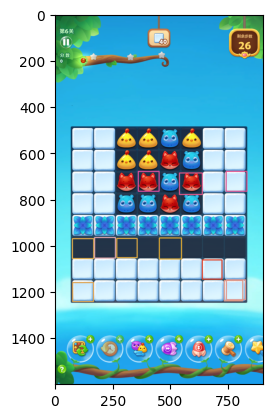

In [16]:
# 通过轮廓检测提取方块的位置
# contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# 提取方块的位置和大小，存储为矩形坐标
blocks = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    blocks.append((x, y, w, h))
    if w < 20 or h < 20 or np.abs(w - h) > 10 or w > 900 / 9 or w < (900 / 9) * 0.8:
        continue
    cv2.rectangle(img3, (x, y), (x + w, y + h), (x % 200, y % 200, 222), 3)
    # print(x, y, w, h)

pImg("blocks", img3)